In [18]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'a94b6406-c800-4cc5-b20d-6f790625c82e',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
 
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [19]:
type(data)

dict

In [20]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [21]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.Timestamp.now()
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10486,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.950550e+07,1.950550e+07,False,NaN,1,NaN,NaN,None,2023-10-06T12:07:00.000Z,27747.113926,1.236319e+10,21.5206,0.318307,-0.032960,2.913103,7.895885,-4.441744,-8.069280,5.412213e+11,49.7593,5.826894e+11,None,2023-10-06T12:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-06 20:09:38.491956
1,1027,Ethereum,ETH,ethereum,7490,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202444e+08,1.202444e+08,True,NaN,2,NaN,NaN,None,2023-10-06T12:07:00.000Z,1634.634794,5.369304e+09,17.0983,0.207894,-0.180927,-2.073633,0.158871,-10.705534,-12.027169,1.965557e+11,18.0712,1.965557e+11,None,2023-10-06T12:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-06 20:09:38.491956
2,825,Tether USDt,USDT,tether,63204,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.336690e+10,8.642571e+10,True,NaN,3,NaN,NaN,None,2023-10-06T12:07:00.000Z,1.000285,1.920948e+10,11.4978,0.002907,0.028163,0.027393,0.075284,0.192385,-0.031806,8.339062e+10,7.6663,8.645031e+10,None,2023-10-06T12:07:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-06 20:09:38.491956
3,1839,BNB,BNB,bnb,1660,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538460e+08,1.538460e+08,False,NaN,4,NaN,NaN,None,2023-10-06T12:07:00.000Z,212.124800,3.472241e+08,4.5750,0.064887,-0.241309,-1.714980,-1.287890,-12.322707,-10.243181,3.263455e+10,3.0004,3.263455e+10,None,2023-10-06T12:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-06 20:09:38.491956
4,52,XRP,XRP,xrp,1108,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.331236e+10,9.998840e+10,False,NaN,5,NaN,NaN,None,2023-10-06T12:07:00.000Z,0.521313,7.604424e+08,-18.4745,-0.106723,-0.363468,0.219294,4.054933,-15.593147,11.520677,2.779242e+10,2.5552,5.213129e+10,None,2023-10-06T12:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-06 20:09:38.491956
5,3408,USDC,USDC,usd-coin,14326,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.522847e+10,2.522847e+10,False,NaN,6,NaN,NaN,None,2023-10-06T12:07:00.000Z,1.000168,2.666770e+09,13.5463,0.004458,0.022121,0.002939,0.001847,-0.000574,-0.041074,2.523272e+10,2.3200,2.523272e+10,None,2023-10-06T12:07:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-10-06 20:09:38.491956
6,5426,Solana,SOL,solana,534,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.135689e+08,5.591588e+08,True,NaN,7,NaN,NaN,None,2023-10-06T12:07:00.000Z,23.187563,3.812187e+08,5.1835,0.100044,-0.428634,15.312802,17.399140,0.648286,6.397022,9.589654e+09,0.8817,1.296553e+10,None,2023-10-06T12:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-06 20:09:38.491956
7,2010,Cardano,ADA,cardano,942,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.514434e+10,3.622901e+10,False,NaN,8,NaN,NaN,None,2023-10-06T12:07:00.000Z,0.263891,1.055131e+08,8.5193,-0.099958,0.712859,4.780214,3.079897,-9.935911,-7.641371,9.274272e+09,0.8526,1.187509e+10,None,2023-10-06T12:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-06 20:09:38.491956
8,74,Dogecoin,DOGE,dogecoin,803,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.412989e+1

In [41]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'a94b6406-c800-4cc5-b20d-6f790625c82e',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.Timestamp.now()
    df = pd.concat([df2, df2], ignore_index=True)
    
    return df

In [ ]:
import os 
from time import time
from time import sleep

for i in range(333):
    df = api_runner()
    print('API Runner completed')
    sleep(60)
exit()

In [44]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,10486,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.950564e+07,1.950564e+07,False,NaN,1,NaN,NaN,None,2023-10-06T13:25:00.000Z,27407.684059,1.311330e+10,24.8739,-1.109937,-1.899233,1.537064,6.632908,-5.520816,-9.278840,5.346043e+11,49.5687,5.755614e+11,None,2023-10-06T13:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-06 21:27:03.455321
1,1027,Ethereum,ETH,ethereum,7490,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202444e+08,1.202444e+08,True,NaN,2,NaN,NaN,None,2023-10-06T13:25:00.000Z,1624.113675,5.651920e+09,21.2425,-0.611049,-1.059907,-2.890585,-0.436976,-11.145630,-12.649020,1.952906e+11,18.1009,1.952906e+11,None,2023-10-06T13:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-06 21:27:03.455321
2,825,Tether USDt,USDT,tether,63204,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.336690e+10,8.642571e+10,True,NaN,3,NaN,NaN,None,2023-10-06T13:25:00.000Z,1.000060,2.024912e+10,16.2523,-0.014041,-0.025618,-0.024214,0.063153,0.207686,-0.011115,8.337193e+10,7.7315,8.643093e+10,None,2023-10-06T13:25:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-06 21:27:03.455321
3,1839,BNB,BNB,bnb,1660,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538460e+08,1.538460e+08,False,NaN,4,NaN,NaN,None,2023-10-06T13:25:00.000Z,211.174300,3.518096e+08,5.2856,-0.395651,-0.747228,-2.421627,-1.660636,-12.657974,-10.705124,3.248832e+10,3.0123,3.248832e+10,None,2023-10-06T13:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-06 21:27:03.455321
4,52,XRP,XRP,xrp,1108,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.331236e+10,9.998840e+10,False,NaN,5,NaN,NaN,None,2023-10-06T13:25:00.000Z,0.519251,7.685131e+08,-16.6044,-0.461754,-0.984769,-2.598389,3.563048,-15.791753,11.131850,2.768248e+10,2.5658,5.192507e+10,None,2023-10-06T13:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-06 21:27:03.455321
5,3408,USDC,USDC,usd-coin,14326,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.523118e+10,2.523118e+10,False,NaN,6,NaN,NaN,None,2023-10-06T13:25:00.000Z,0.999880,2.797892e+09,19.0785,-0.011148,-0.034091,-0.063339,-0.023313,-0.000525,-0.021578,2.522815e+10,2.3383,2.522815e+10,None,2023-10-06T13:25:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-10-06 21:27:03.455321
6,5426,Solana,SOL,solana,534,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.135688e+08,5.591587e+08,True,NaN,7,NaN,NaN,None,2023-10-06T13:25:00.000Z,22.928364,4.014291e+08,9.1817,-1.150202,-2.131383,13.598466,16.028030,-0.086676,5.030510,9.482456e+09,0.8789,1.282060e+10,None,2023-10-06T13:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-06 21:27:03.455321
7,2010,Cardano,ADA,cardano,942,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.514466e+10,3.622901e+10,False,NaN,8,NaN,NaN,None,2023-10-06T13:25:00.000Z,0.262104,1.082681e+08,12.2965,-0.576931,0.260878,3.512137,2.435112,-10.606991,-8.422603,9.211573e+09,0.8542,1.179470e+10,None,2023-10-06T13:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-06 21:27:03.455321
8,74,Dogecoin,DOGE,dogecoin,803,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me..."

In [45]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [46]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,10486,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19505637.00000,19505637.00000,False,NaN,1,NaN,NaN,None,2023-10-06T13:25:00.000Z,27407.68406,13113296806.48074,24.87390,-1.10994,-1.89923,1.53706,6.63291,-5.52082,-9.27884,534604336259.98096,49.56870,575561365233.01001,None,2023-10-06T13:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-06 21:27:03.455321
1,1027,Ethereum,ETH,ethereum,7490,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120244439.39826,120244439.39826,True,NaN,2,NaN,NaN,None,2023-10-06T13:25:00.000Z,1624.11367,5651919779.81384,21.24250,-0.61105,-1.05991,-2.89059,-0.43698,-11.14563,-12.64902,195290638310.90906,18.10090,195290638310.91000,None,2023-10-06T13:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-06 21:27:03.455321
2,825,Tether USDt,USDT,tether,63204,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83366897433.59711,86425711834.21460,True,NaN,3,NaN,NaN,None,2023-10-06T13:25:00.000Z,1.00006,20249121261.89640,16.25230,-0.01404,-0.02562,-0.02421,0.06315,0.20769,-0.01111,83371928877.49890,7.73150,86430927886.80000,None,2023-10-06T13:25:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-06 21:27:03.455321
3,1839,BNB,BNB,bnb,1660,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,153845973.18099,153845973.18099,False,NaN,4,NaN,NaN,None,2023-10-06T13:25:00.000Z,211.17430,351809635.72722,5.28560,-0.39565,-0.74723,-2.42163,-1.66064,-12.65797,-10.70512,32488315749.23677,3.01230,32488315749.24000,None,2023-10-06T13:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-06 21:27:03.455321
4,52,XRP,XRP,xrp,1108,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,53312364216.00000,99988397127.00000,False,NaN,5,NaN,NaN,None,2023-10-06T13:25:00.000Z,0.51925,768513105.99258,-16.60440,-0.46175,-0.98477,-2.59839,3.56305,-15.79175,11.13185,27682480996.64537,2.56580,51925067296.75000,None,2023-10-06T13:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-06 21:27:03.455321
5,3408,USDC,USDC,usd-coin,14326,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,25231180019.99701,25231180019.99701,False,NaN,6,NaN,NaN,None,2023-10-06T13:25:00.000Z,0.99988,2797891898.12648,19.07850,-0.01115,-0.03409,-0.06334,-0.02331,-0.00053,-0.02158,25228148571.97223,2.33830,25228148571.97000,None,2023-10-06T13:25:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-10-06 21:27:03.455321
6,5426,Solana,SOL,solana,534,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,413568777.81760,559158742.62510,True,NaN,7,NaN,NaN,None,2023-10-06T13:25:00.000Z,22.92836,401429083.99537,9.18170,-1.15020,-2.13138,13.59847,16.02803,-0.08668,5.03051,9482455663.54647,0.87890,12820595437.13000,None,2023-10-06T13:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-06 21:27:03.455321
7,2010,Cardano,ADA,cardano,942,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35144660648.94400,36229014789.87600,False,NaN,8,NaN,NaN,None,2023-10-06T13:25:00.000Z,0.26210,108268144.32638,12.29650,-0.57693,0.26088,3.51214,2.43511,-10.60699,-8.42260,9211572994.43043,0.85420,11794701587.53000,None,2023-10-06T13:25:00.000Z,

In [47]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-1.10994,-1.89923,1.53706,6.63291,-5.52082,-9.27884
Ethereum,-0.61105,-1.05991,-2.89059,-0.43698,-11.14563,-12.64902
Tether USDt,-0.01404,-0.02562,-0.02421,0.06315,0.20769,-0.01111
BNB,-0.39565,-0.74723,-2.42163,-1.66064,-12.65797,-10.70512
XRP,-0.46175,-0.98477,-2.59839,3.56305,-15.79175,11.13185
USDC,-0.01115,-0.03409,-0.06334,-0.02331,-0.00053,-0.02158
Solana,-1.15020,-2.13138,13.59847,16.02803,-0.08668,5.03051
Cardano,-0.57693,0.26088,3.51214,2.43511,-10.60699,-8.42260
Dogecoin,-0.36501,-0.42209,-1.71757,-4.49551,-17.38262,-6.73307


In [48]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -1.10994
             quote.USD.percent_change_24h    -1.89923
             quote.USD.percent_change_7d      1.53706
             quote.USD.percent_change_30d     6.63291
             quote.USD.percent_change_60d    -5.52082
             quote.USD.percent_change_90d    -9.27884
Ethereum     quote.USD.percent_change_1h     -0.61105
             quote.USD.percent_change_24h    -1.05991
             quote.USD.percent_change_7d     -2.89059
             quote.USD.percent_change_30d    -0.43698
             quote.USD.percent_change_60d   -11.14563
             quote.USD.percent_change_90d   -12.64902
Tether USDt  quote.USD.percent_change_1h     -0.01404
             quote.USD.percent_change_24h    -0.02562
             quote.USD.percent_change_7d     -0.02421
             quote.USD.percent_change_30d     0.06315
             quote.USD.percent_change_60d     0.20769
             quote.USD.percent_change_90

In [49]:
type(df4)

pandas.core.series.Series

In [50]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -1.10994
            quote.USD.percent_change_24h  -1.89923
            quote.USD.percent_change_7d    1.53706
            quote.USD.percent_change_30d   6.63291
            quote.USD.percent_change_60d  -5.52082
            quote.USD.percent_change_90d  -9.27884
Ethereum    quote.USD.percent_change_1h   -0.61105
            quote.USD.percent_change_24h  -1.05991
            quote.USD.percent_change_7d   -2.89059
            quote.USD.percent_change_30d  -0.43698
            quote.USD.percent_change_60d -11.14563
            quote.USD.percent_change_90d -12.64902
Tether USDt quote.USD.percent_change_1h   -0.01404
            quote.USD.percent_change_24h  -0.02562
            quote.USD.percent_change_7d   -0.02421
            quote.USD.percent_change_30d   0.06315
            quote.USD.percent_change_60d   0.20769
            quote.USD.percent_change_90d  -0.01111
BNB         quote.USD.percent_change_1h   -0.39565
            quote.USD.percent_change_24h  -0.74723
            quote.USD.percent_change_7d   -2.42163
            quote.USD.percent_change_30d  -1.66064
            quote.USD.percent_change_60d -12.65797
            quote.USD.percent_change_90d -10.70512
XRP         quote.USD.percent_change_1h   -0.46175
            quote.USD.percent_change_24h  -0.98477
            quote.USD.percent_change_7d   -2.59839
            quote.USD.percent_change_30d   3.56305
            quote.USD.percent_change_60d -15.79175
            quote.USD.percent_change_90d  11.13185
USDC        quote.USD.percent_change_1h   -0.01115
            quote.USD.percent_change_24h  -0.03409
            quote.USD.percent_change_7d   -0.06334
            quote.USD.percent_change_30d  -0.02331
            quote.USD.percent_change_60d  -0.00053
            quote.USD.percent_change_90d  -0.02158
Solana      quote.USD.percent_change_1h   -1.15020
            quote.USD.percent_change_24h  -2.13138
            quote.USD.percent_change_7d   13.59847
            quote.USD.percent_change_30d  16.02803
            quote.USD.percent_change_60d  -0.08668
            quote.USD.percent_change_90d   5.03051
Cardano     quote.USD.percent_change_1h   -0.57693
            quote.USD.percent_change_24h   0.26088
            quote.USD.percent_change_7d    3.51214
            quote.USD.percent_change_30d   2.43511
            quote.USD.percent_change_60d -10.60699
            quote.USD.percent_change_90d  -8.42260
Dogecoin    quote.USD.percent_change_1h   -0.36501
            quote.USD.percent_change_24h  -0.42209
            quote.USD.percent_change_7d   -1.71757
            quote.USD.percent_change_30d  -4.49551
            quote.USD.percent_change_60d -17.38262
            quote.USD.percent_change_90d  -6.73307
TRON        quote.USD.percent_change_1h    0.00668
            quote.USD.percent_change_24h  -3.67670
            quote.USD.percent_change_7d   -3.44750
            quote.USD.percent_change_30d  10.88091
            quote.USD.percent_change_60d  12.27772
            quote.USD.percent_change_90d   8.35402
Toncoin     quote.USD.percent_change_1h   -0.17961
            quote.USD.percent_change_24h   1.29240
            quote.USD.percent_change_7d   -4.47643
            quote.USD.percent_change_30d  20.94478
            quote.USD.percent_change_60d  76.51764
            quote.USD.percent_change_90d  53.51921
Dai         quote.USD.percent_change_1h   -0.01606
            quote.USD.percent_change_24h  -0.01293
            quote.USD.percent_change_7d    0.02837
            quote.USD.percent_change_30d   0.02171
            quote.USD.percent_change_60d   0.04719
            quote.USD.percent_change_90d   0.06340
Polygon     quote.USD.percent_change_1h    0.34466
            quote.USD.percent_change_24h  -1.12260
            quote.USD.percent_change_7d    6.85342
            quote.USD.percent_change_30d   0.56283
            quote.USD.percent_change_60d -16.86461
            quo

In [51]:
df5.count()

values    90
dtype: int64

In [54]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-1.10994
1,Bitcoin,quote.USD.percent_change_24h,-1.89923
2,Bitcoin,quote.USD.percent_change_7d,1.53706
3,Bitcoin,quote.USD.percent_change_30d,6.63291
4,Bitcoin,quote.USD.percent_change_60d,-5.52082
5,Bitcoin,quote.USD.percent_change_90d,-9.27884
6,Ethereum,quote.USD.percent_change_1h,-0.61105
7,Ethereum,quote.USD.percent_change_24h,-1.05991
8,Ethereum,quote.USD.percent_change_7d,-2.89059
9,Ethereum,quote.USD.percent_change_30d,-0.43698


In [55]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-1.10994
1,Bitcoin,quote.USD.percent_change_24h,-1.89923
2,Bitcoin,quote.USD.percent_change_7d,1.53706
3,Bitcoin,quote.USD.percent_change_30d,6.63291
4,Bitcoin,quote.USD.percent_change_60d,-5.52082
5,Bitcoin,quote.USD.percent_change_90d,-9.27884
6,Ethereum,quote.USD.percent_change_1h,-0.61105
7,Ethereum,quote.USD.percent_change_24h,-1.05991
8,Ethereum,quote.USD.percent_change_7d,-2.89059
9,Ethereum,quote.USD.percent_change_30d,-0.43698


In [59]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-1.10994
1,Bitcoin,24h,-1.89923
2,Bitcoin,7d,1.53706
3,Bitcoin,30d,6.63291
4,Bitcoin,60d,-5.52082
5,Bitcoin,90d,-9.27884
6,Ethereum,1h,-0.61105
7,Ethereum,24h,-1.05991
8,Ethereum,7d,-2.89059
9,Ethereum,30d,-0.43698


In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

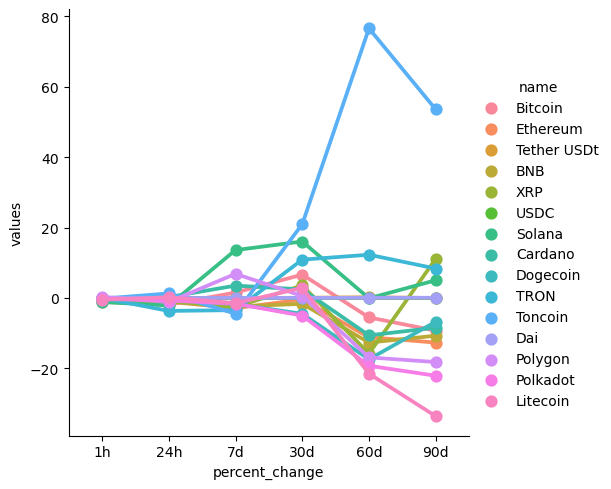

In [61]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [66]:
df10 = df[['name','quote.USD.price','Timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,Timestamp
0,Bitcoin,27407.68406,2023-10-06 21:27:03.455321
15,Bitcoin,27407.68406,2023-10-06 21:27:03.455321


<Axes: xlabel='Timestamp', ylabel='quote.USD.price'>

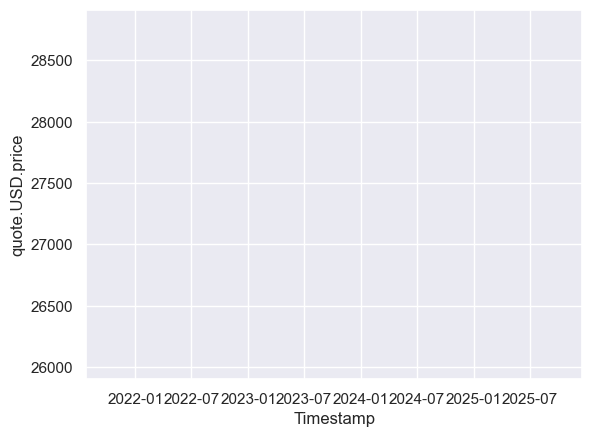

In [68]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='Timestamp', y='quote.USD.price', data = df10)